# Context

### The FIFA19 dataset gives you complete information about the players which are involved in club football or international. The information consists of Age, Wage, Country, Club, and skills.

# Objective

### Can we predict correclty Potential or Ball Control of a player on the basis of other features involving skills

In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Too see full dataframe...
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


# Preprocessing

### The preprocessing involves initial data exploration,extract transform load,data cleansing and feature creation.

## Initial Data Exploration

### The data is available in csv format. 

## ETL: Extract Transform and Load

### ETL is an import tool to convert data into readable format. We first extract the csv file and then transform into one Data Frame.

In [147]:
df_fifa19=pd.read_csv("../input/data.csv", index_col=0)
df_fifa19.head(2)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [148]:
# Size of the data
print (df_fifa19.shape)
# type of each column
print (df_fifa19.dtypes)

(18207, 88)
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS              

## Data Cleansing

In [149]:
# see missing data
print (df_fifa19.isnull().sum())

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [150]:
# Deleting all the rows having null values
df_fifa19.dropna(subset=['Club', 'Preferred Foot','International Reputation','Weak Foot','Skill Moves', \
                         'Work Rate','Body Type','Real Face','Position', 'Jersey Number', 'Height','Weight', \
                         'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', \
                         'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', \
                         'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', \
                         'Interceptions', 'Positioning','Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', \
                         'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'], inplace=True)
print (df_fifa19.isnull().sum())
print (df_fifa19.shape)

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                            0
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                        0
Jersey Number                   0
Joined                       1264
Loaned From                 16654
Contract Valid Until            0
Height                          0
Weight                          0
LS                           1992
ST                           1992
RS            

In [151]:
# Eliminating sign and alphabets like €and M from Columns Value & Wage
df_fifa19['Value'] = df_fifa19.Value.apply(lambda x: x.strip ('M'))
df_fifa19['Value'] = df_fifa19.Value.apply(lambda x: x.strip ('€') )  
df_fifa19['Value'] = df_fifa19.Value.apply(lambda x: x.strip ('K'))
df_fifa19['Wage'] = df_fifa19.Wage.apply(lambda x: x.strip ('K'))
df_fifa19['Wage'] = df_fifa19.Wage.apply(lambda x: x.strip ('€') )   
df_fifa19[['Value']]=df_fifa19[['Value']].astype('float')
df_fifa19[['Wage']]=df_fifa19[['Wage']].astype('float')
print (df_fifa19.dtypes)
df_fifa19.head(2)

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                       float64
Wage                        float64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77.0,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


# Visualization

### The purpose of visualization is to see the trend and shape of the specfic feature.

In [152]:
#df_club=df_fifa19.group(['Club', as_index=False]).mean()
df_club=df_fifa19.groupby(['Club']).mean()
df_top15 = df_club.sort_values(['Wage'], ascending=False, axis=0)
#df_top15=df_top15.groupby(['Club','Wage']).mean()
df_top15.head(2)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Real Madrid,213881.000000,24.030303,78.242424,84.636364,160.454545,152.030303,1818.939394,2.090909,3.212121,2.848485,17.666667,58.606061,53.030303,57.181818,69.606061,48.090909,64.060606,58.090909,51.939394,62.060606,69.909091,70.242424,71.000000,68.757576,74.575758,70.090909,62.242424,67.666667,69.757576,66.303030,56.363636,60.606061,56.181818,57.454545,64.181818,52.878788,70.303030,57.030303,56.060606,53.121212,19.000000,19.000000,17.666667,17.545455,18.636364
FC Barcelona,210877.151515,23.848485,78.030303,85.303030,110.600000,146.575758,1842.151515,2.242424,3.272727,2.848485,17.606061,59.818182,54.696970,56.060606,72.363636,52.060606,66.121212,58.303030,51.848485,65.727273,70.636364,68.424242,67.393939,69.212121,75.242424,69.696970,64.303030,67.090909,68.393939,65.484848,57.878788,58.727273,57.000000,59.272727,68.121212,56.030303,72.060606,58.727273,57.151515,53.787879,18.151515,18.212121,18.878788,18.636364,18.696970


In [153]:
df_top15=  df_top15.reset_index()
df_top15=df_top15.head(15)
df_top15.shape
df_bar=df_top15[['Club', 'Wage']]
df_bar=df_bar.set_index('Club')
df_bar=df_bar.round()
df_bar[['Wage']]=df_bar[['Wage']].astype('int')
df_bar.head(1)

,Wage
Club,
Real Madrid,152


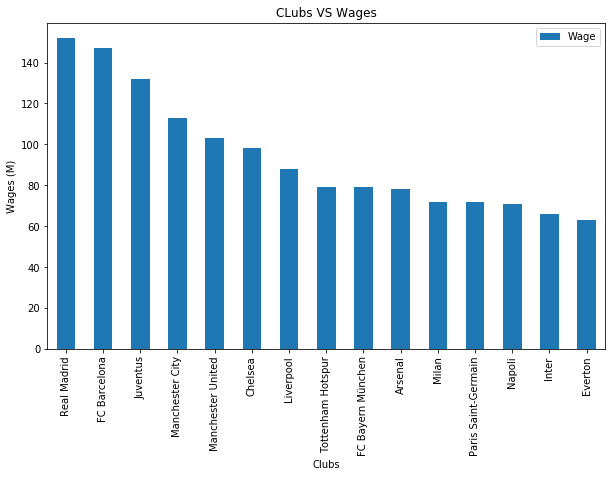

In [154]:
# plot data
import matplotlib.pyplot as plt
df_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Clubs') # add to x-label to the plot
plt.ylabel('Wages (M)') # add y-label to the plot
plt.title('CLubs VS Wages') # add title to the plot

plt.show()

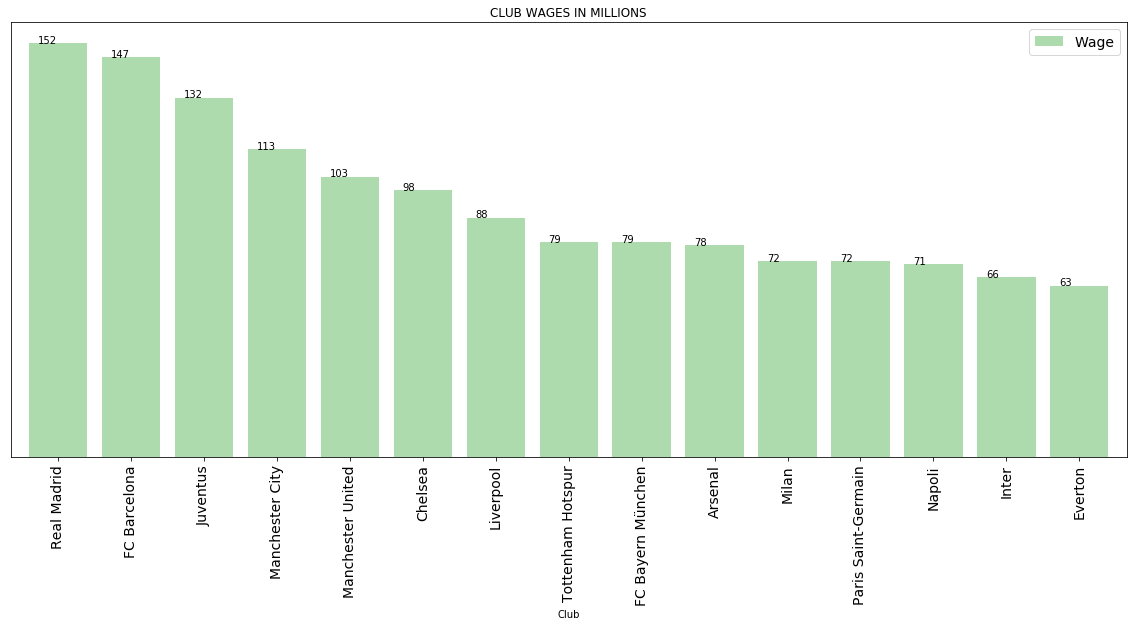

In [155]:
# Plot value on top of bar chart
# Using artist layes to create bar chart
colors_list = ['#5cb85c','#5bc0de','#d9534f']
ax = df_bar.plot( kind='bar', alpha=0.5, figsize=(20, 8), width=.8 , color=colors_list, edgecolor=None, ) #rot=0)
plt.legend(labels=df_bar.columns,fontsize= 14)
plt.title("CLUB WAGES IN MILLIONS",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks([])

ax.set_title("CLUB WAGES IN MILLIONS")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (p.get_x()+0.15*width, p.get_y() + height + 0.0001 ))

# Model Making

### As we have choose two features ('Potential' & 'BallCOntrol') to determine which one has more dendency on other features. Let start with BallControl.  

In [156]:
df_fifa19_numeric=df_fifa19._get_numeric_data()
df_fifa19_numeric.head(2)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110.5,565.0,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77.0,405.0,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


In [157]:
df_fifa19_numeric.corr()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.740059,-0.417698,0.047481,0.082851,-0.204988,-0.232196,-0.355581,-0.076382,-0.057347,0.183699,-0.132652,-0.082517,-0.107784,-0.137290,-0.159984,-0.030686,-0.170099,-0.200409,-0.188047,-0.100515,0.132667,0.131741,-0.020288,-0.409434,0.047324,-0.166564,-0.169342,-0.055158,-0.260417,-0.161479,-0.228827,-0.161825,-0.088865,-0.215496,-0.141557,-0.386182,-0.111650,-0.087346,-0.069558,-0.105269,-0.110889,-0.106216,-0.118157,-0.105301
Age,-0.740059,1.000000,0.453252,-0.252799,-0.044964,0.143944,0.238560,0.254064,0.060193,0.028737,-0.240813,0.131788,0.070071,0.148819,0.134731,0.143565,0.011510,0.144878,0.195120,0.183135,0.086686,-0.158441,-0.150996,-0.018353,0.453785,-0.089610,0.158509,0.178950,0.099725,0.334980,0.156305,0.267105,0.199092,0.084534,0.189320,0.140348,0.393253,0.144225,0.120774,0.103710,0.100152,0.105288,0.103732,0.115568,0.102251
Overall,-0.417698,0.453252,1.000000,0.660850,-0.233667,0.575940,0.608863,0.501142,0.211741,0.415865,-0.218778,0.396261,0.333887,0.342371,0.504196,0.392264,0.374267,0.420675,0.398184,0.484981,0.462366,0.197856,0.211919,0.266363,0.851144,0.103947,0.443220,0.265609,0.367111,0.351064,0.422182,0.396719,0.322788,0.358130,0.501137,0.342354,0.730109,0.288005,0.253898,0.223626,-0.026559,-0.025959,-0.030142,-0.018179,-0.023988
Potential,0.047481,-0.252799,0.660850,1.000000,-0.235739,0.488999,0.384714,0.374155,0.161411,0.354908,-0.010901,0.246641,0.243554,0.201408,0.369530,0.254808,0.315910,0.279425,0.230418,0.321262,0.355262,0.235875,0.237933,0.223043,0.513877,0.138908,0.288771,0.108479,0.202373,0.075014,0.266765,0.170385,0.155150,0.245681,0.348128,0.224547,0.440228,0.163117,0.143977,0.129221,-0.053146,-0.054703,-0.058936,-0.052417,-0.053251
Value,0.082851,-0.044964,-0.233667,-0.235739,1.000000,-0.254066,-0.112361,-0.211009,-0.050415,-0.113953,0.009929,-0.065053,-0.075392,-0.035737,-0.090319,-0.091752,-0.071027,-0.096415,-0.090482,-0.097524,-0.075908,-0.004936,-0.001447,-0.028198,-0.217056,-0.010668,-0.093817,-0.021066,-0.018361,-0.010699,-0.088924,-0.054774,-0.033675,-0.073168,-0.141268,-0.074130,-0.171389,-0.024131,-0.017417,-0.012401,-0.035517,-0.037066,-0.034616,-0.035799,-0.033533
Wage,-0.204988,0.143944,0.575940,0.488999,-0.254066,1.000000,0.350178,0.670736,0.142082,0.264344,-0.089595,0.234470,0.218643,0.189682,0.298653,0.258932,0.238180,0.260626,0.237743,0.278925,0.279082,0.126200,0.131409,0.156919,0.499564,0.089633,0.259970,0.129526,0.179401,0.140116,0.250730,0.196039,0.158878,0.227837,0.317034,0.224522,0.423256,0.147376,0.127686,0.112396,-0.025196,-0.024791,-0.027897,-0.025006,-0.025579
Special,-0.232196,0.238560,0.608863,0.384714,-0.112361,0.350178,1.000000,0.292718,0.340578,0.763206,-0.135029,0.866342,0.724293,0.644229,0.906730,0.773793,0.874416,0.852065,0.806398,0.846290,0.912439,0.653907,0.645470,0.699249,0.598932,0.586847,0.835615,0.322756,0.792469,0.193182,0.840040,0.667057,0.562146,0.824589,0.761955,0.734577,0.753364,0.562805,0.539232,0.507095,-0.673673,-0.672872,-0.669303,-0.667248,-0.672389
International Reputation,-0.355581,0.254064,0.501142,0.374155,-0.211009,0.670736,0.292718,1.000000,0.127982,0.208307,-0.078233,0.191862,0.178313,0.158035,0.243563,0.243087,0.179165,0.233756,0.223492,0.240288,0.218469,0.044679,0.044408,0.100791,0.447417,0.050583,0.227716,0.120762,0.094901,0.131083,0.213887,0.173701,0.130462,0.182816,0.284885,0.218791,0.394793,0.116037,0.093926,0.080074,0.005242,0.004729,0.001253,0.007646,0.003935
Weak Foot,-0.076382,0.060193,0.211741,0.161411,-0.050415,0.142082,0.340578,0.127982,1.000000,0.339288,-

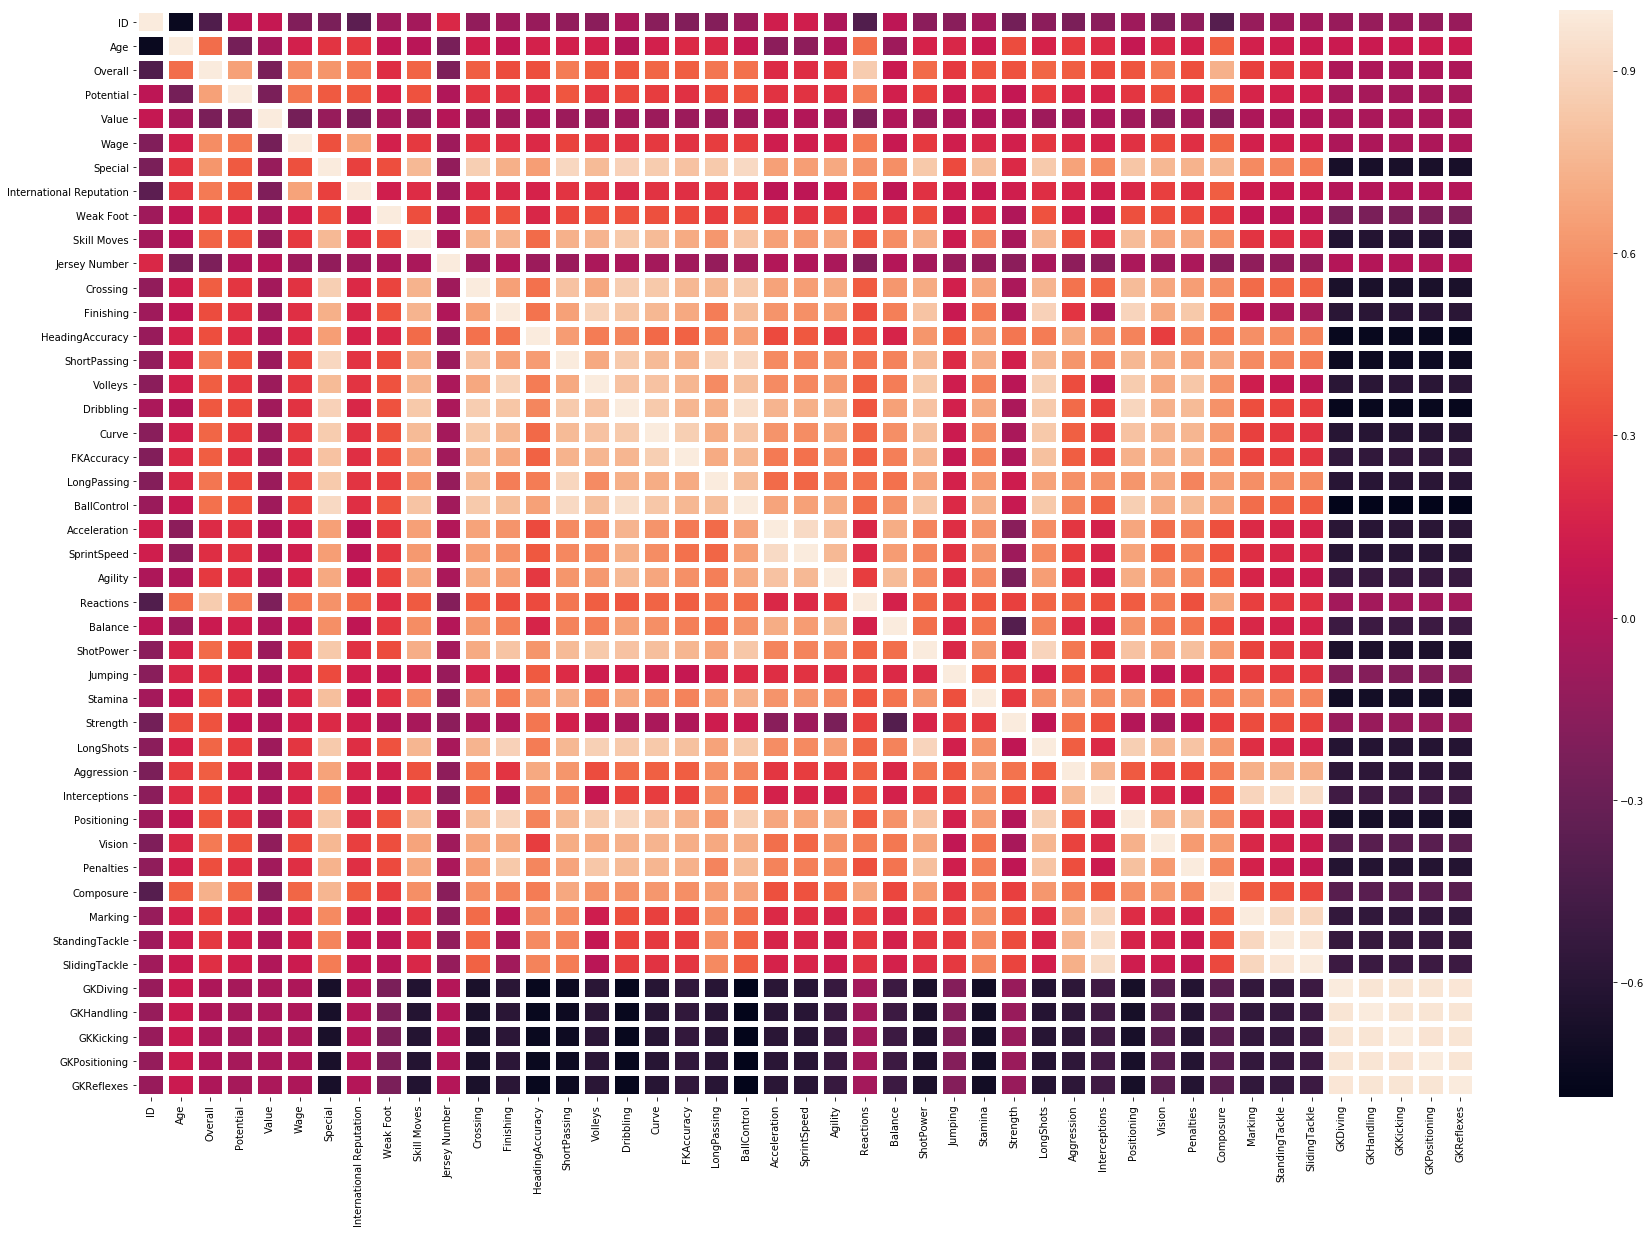

In [158]:
# View of Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df_fifa19_numeric.corr()
fig, ax = plt.subplots(figsize=(30,20))         # Sample figsize in inches
sns.heatmap(corr_matrix, annot=False, linewidths=5, ax=ax, xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
#sns.heatmap(corr, annot=True, fmt=".1f",linewidth=0.5 xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [159]:
viz=df_fifa19._get_numeric_data()
viz.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,110.5,565.0,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,77.0,405.0,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,118.5,290.0,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,72.0,260.0,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,102.0,355.0,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [160]:
from scipy import stats

#1
pearson_coef, p_value = stats.pearsonr(viz['Age'], viz['BallControl'])
print("#1 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#2
pearson_coef, p_value = stats.pearsonr(viz['Weak Foot'], viz['BallControl'])
print("#2 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#3
pearson_coef, p_value = stats.pearsonr(viz['Skill Moves'], viz['BallControl'])
print("#3 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#4
pearson_coef, p_value = stats.pearsonr(viz['Crossing'], viz['BallControl'])
print("#4 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#5
pearson_coef, p_value = stats.pearsonr(viz['Finishing'], viz['BallControl'])
print("#5 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#6
pearson_coef, p_value = stats.pearsonr(viz['HeadingAccuracy'], viz['BallControl'])
print("#6 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#7
pearson_coef, p_value = stats.pearsonr(viz['Volleys'], viz['BallControl'])
print("#7 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#8
pearson_coef, p_value = stats.pearsonr(viz['Dribbling'], viz['BallControl'])
print("#8 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#9
pearson_coef, p_value = stats.pearsonr(viz['Curve'], viz['Potential'])
print("#9 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#10

pearson_coef, p_value = stats.pearsonr(viz['FKAccuracy'], viz['BallControl'])
print("#10 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#11
pearson_coef, p_value = stats.pearsonr(viz['LongPassing'], viz['BallControl'])
print("#11 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#12
pearson_coef, p_value = stats.pearsonr(viz['Potential'], viz['BallControl'])
print("#12 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#13
pearson_coef, p_value = stats.pearsonr(viz['Acceleration'], viz['BallControl'])
print("#13 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#14
pearson_coef, p_value = stats.pearsonr(viz['SprintSpeed'], viz['BallControl'])
print("#14 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#15
pearson_coef, p_value = stats.pearsonr(viz['Agility'], viz['BallControl'])
print("#15 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#16
pearson_coef, p_value = stats.pearsonr(viz['Reactions'], viz['BallControl'])
print("#16 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#17
pearson_coef, p_value = stats.pearsonr(viz['Balance'], viz['BallControl'])
print("#17 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#18
pearson_coef, p_value = stats.pearsonr(viz['ShotPower'], viz['Potential'])
print("#18 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#19
pearson_coef, p_value = stats.pearsonr(viz['Jumping'], viz['BallControl'])
print("#19 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#20
pearson_coef, p_value = stats.pearsonr(viz['Stamina'], viz['BallControl'])
print("#20 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#21
pearson_coef, p_value = stats.pearsonr(viz['Strength'], viz['BallControl'])
print("#21 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#22
pearson_coef, p_value = stats.pearsonr(viz['LongShots'], viz['BallControl'])
print("#22 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#23
pearson_coef, p_value = stats.pearsonr(viz['Aggression'], viz['BallControl'])
print("#23 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#24
pearson_coef, p_value = stats.pearsonr(viz['Interceptions'], viz['BallControl'])
print("#24 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#25
pearson_coef, p_value = stats.pearsonr(viz['Positioning'], viz['BallControl'])
print("#25 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#26
pearson_coef, p_value = stats.pearsonr(viz['Vision'], viz['BallControl'])
print("#26 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#27
pearson_coef, p_value = stats.pearsonr(viz['Penalties'], viz['BallControl'])
print("# 27 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#28
pearson_coef, p_value = stats.pearsonr(viz['Composure'], viz['BallControl'])
print("#28 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#29
pearson_coef, p_value = stats.pearsonr(viz['Marking'], viz['BallControl'])
print("#29 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#30
pearson_coef, p_value = stats.pearsonr(viz['StandingTackle'], viz['BallControl'])
print("#30 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#31
pearson_coef, p_value = stats.pearsonr(viz['SlidingTackle'], viz['BallControl'])

print("#31 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#1 The Pearson Correlation Coefficient is 0.08668558635859482  with a P-value of P = 3.0886563811833975e-31
#2 The Pearson Correlation Coefficient is 0.3551268045775461  with a P-value of P = 0.0
#3 The Pearson Correlation Coefficient is 0.8177318913660281  with a P-value of P = 0.0
#4 The Pearson Correlation Coefficient is 0.8410580920174204  with a P-value of P = 0.0
#5 The Pearson Correlation Coefficient is 0.7881547591016318  with a P-value of P = 0.0
#6 The Pearson Correlation Coefficient is 0.6586866965811333  with a P-value of P = 0.0
#7 The Pearson Correlation Coefficient is 0.7947442357258936  with a P-value of P = 0.0
#8 The Pearson Correlation Coefficient is 0.9389616487462347  with a P-value of P = 0.0
#9 The Pearson Correlation Coefficient is 0.27942459513049983  with a P-value of P = 1.144923e-318
#10 The Pearson Correlation Coefficient is 0.7593719140451999  with a P-value of P = 0.0
#11 The Pearson Correlation Coefficient is 0.7893225784165409  with a P-value of P = 0.0

### From the above correlation results, we summarize as follow 

### Very Strong Correlation 'Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning'

### Strong Correlation 'Finishing', 'Volleys', 'FKAccuracy','LongPassing','Heading Accuracy', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Stamina', 'Vision', 'Penalties', 'Composure'

In [161]:
cdf=viz[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning', 'BallControl','Finishing',\
         'Volleys', 'FKAccuracy','LongPassing','HeadingAccuracy', 'Acceleration', 'SprintSpeed', \
         'Agility', 'Balance', 'Stamina', 'Vision', 'Penalties', 'Composure']]
msk = np.random.rand(len(viz)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Model Definition

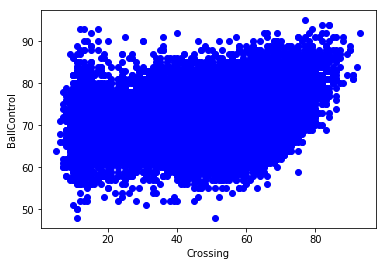

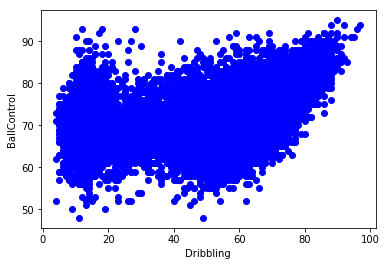

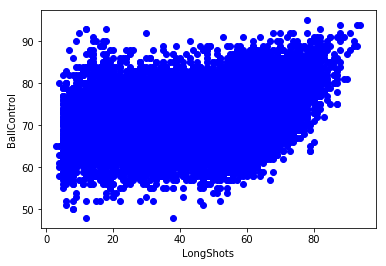

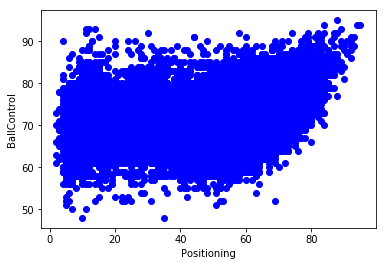

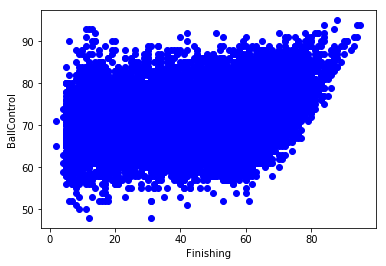

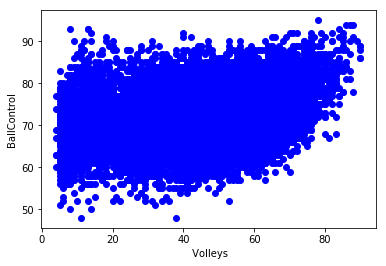

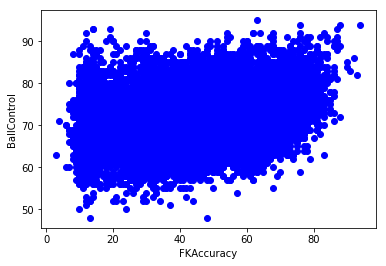

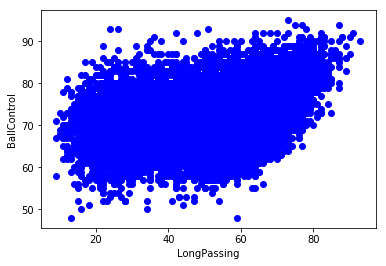

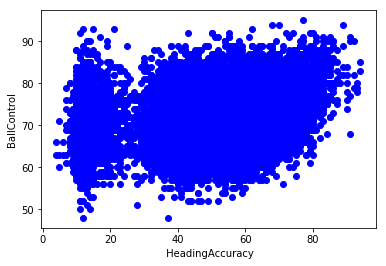

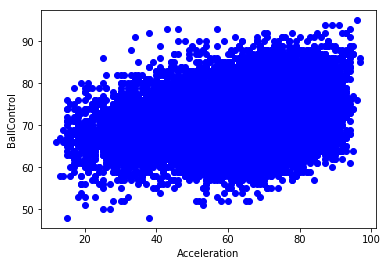

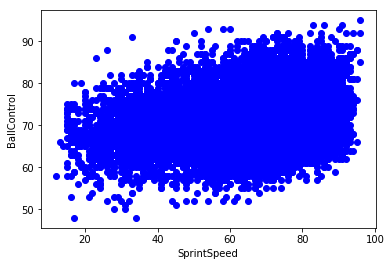

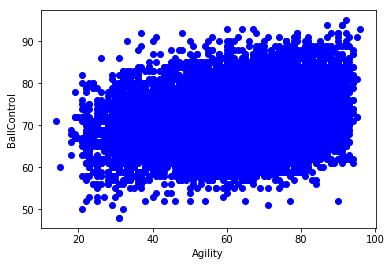

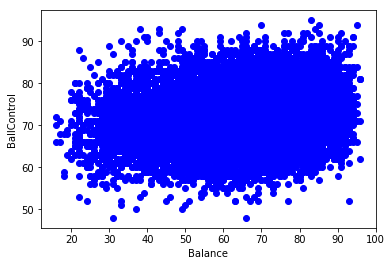

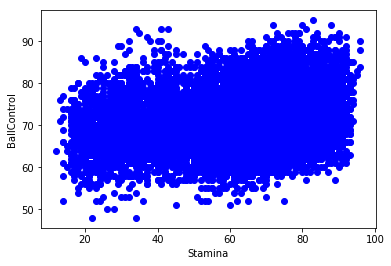

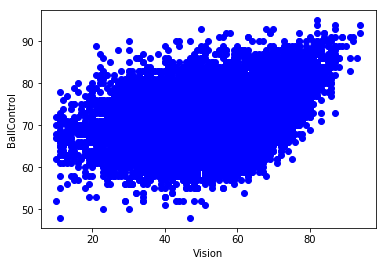

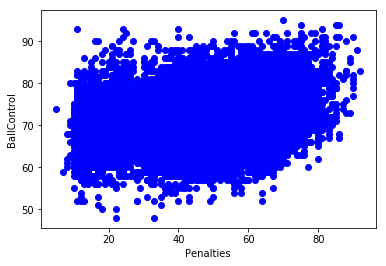

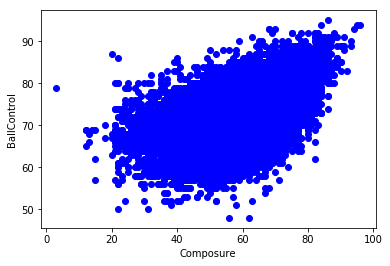

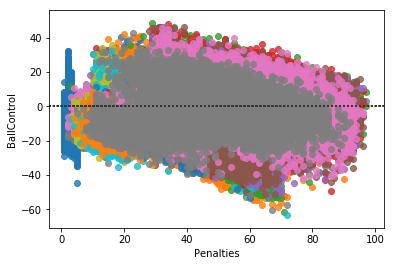

In [162]:
#plt.scatter(viz.Skill Moves, viz.BallControl,  color='blue')
#plt.xlabel('Skill Moves')
#plt.ylabel("BallControl")
#plt.show()

plt.scatter(viz.Crossing, viz.Potential,  color='blue')
plt.xlabel('Crossing')
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Dribbling, viz.Potential,  color='blue')
plt.xlabel('Dribbling')
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.LongShots, viz.Potential,  color='blue')
plt.xlabel('LongShots')
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Positioning, viz.Potential,  color='blue')
plt.xlabel('Positioning')
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Finishing, viz.Potential,  color='blue')
plt.xlabel('Finishing')
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz. Volleys, viz.Potential,  color='blue')
plt.xlabel(" Volleys")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.FKAccuracy, viz.Potential,  color='blue')
plt.xlabel("FKAccuracy")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.LongPassing, viz.Potential,  color='blue')
plt.xlabel("LongPassing")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz. HeadingAccuracy, viz.Potential,  color='blue')
plt.xlabel(" HeadingAccuracy")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Acceleration, viz.Potential,  color='blue')
plt.xlabel("Acceleration")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.SprintSpeed, viz.Potential,  color='blue')
plt.xlabel("SprintSpeed")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Agility, viz.Potential,  color='blue')
plt.xlabel("Agility")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Balance, viz.Potential,  color='blue')
plt.xlabel("Balance")
plt.ylabel("BallControl")
plt.show()

'Stamina', 'Vision', 'Penalties', 'Composure'
plt.scatter(viz.Stamina, viz.Potential,  color='blue')
plt.xlabel("Stamina")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Vision, viz.Potential,  color='blue')
plt.xlabel("Vision")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Penalties, viz.Potential,  color='blue')
plt.xlabel("Penalties")
plt.ylabel("BallControl")
plt.show()

plt.scatter(viz.Composure, viz.Potential,  color='blue')
plt.xlabel("Composure")
plt.ylabel("BallControl")
plt.show()



sns.residplot(x='Skill Moves', y='BallControl', data=viz)
sns.residplot(x='Vision', y='BallControl', data=viz)
sns.residplot(x='Composure', y='BallControl', data=viz)

sns.residplot(x='Crossing', y='BallControl', data=viz)
sns.residplot(x='Dribbling', y='BallControl', data=viz)
sns.residplot(x='LongShots', y='BallControl', data=viz)

sns.residplot(x='Positioning', y='BallControl', data=viz)
sns.residplot(x='Finishing', y='BallControl', data=viz)
sns.residplot(x='Volleys', y='BallControl', data=viz)

sns.residplot(x='FKAccuracy', y='BallControl', data=viz)
sns.residplot(x='LongPassing', y='BallControl', data=viz)
sns.residplot(x='HeadingAccuracy', y='BallControl', data=viz)

sns.residplot(x='Acceleration', y='BallControl', data=viz)
sns.residplot(x='SprintSpeed', y='BallControl', data=viz)
sns.residplot(x='Agility', y='BallControl', data=viz)

sns.residplot(x='Balance', y='BallControl', data=viz)
sns.residplot(x='Stamina', y='BallControl', data=viz)
sns.residplot(x='Penalties', y='BallControl', data=viz)


#sns.regplot(x='Reactions', y='Potential', data=viz)

# Multilinear Regression

# Model Training

In [163]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning', 'BallControl','Finishing',\
         'Volleys', 'FKAccuracy','LongPassing','HeadingAccuracy', 'Acceleration', 'SprintSpeed', \
         'Agility', 'Balance', 'Stamina', 'Vision', 'Penalties', 'Composure']])
y = np.asanyarray(train[['BallControl']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[-4.42321999e-14  1.37406719e-15  2.38530227e-16 -1.40205360e-15
  -1.57031786e-17  1.00000000e+00 -1.37714743e-15 -1.69962490e-15
  -1.06913162e-15 -4.31652427e-16 -2.15259553e-15  3.45949517e-15
   2.65735430e-15  2.58670344e-15  2.92416525e-15  6.30000947e-16
  -3.11895236e-16 -1.14238331e-15 -1.72742161e-15]]
Intercept:  [-1.84741111e-13]


# Model Evaluation

In [164]:
y_hat= regr.predict( test[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning', 'BallControl',\
                           'Finishing','Volleys', 'FKAccuracy','LongPassing','HeadingAccuracy', 'Acceleration',\
                           'SprintSpeed','Agility', 'Balance', 'Stamina', 'Vision', 'Penalties', 'Composure']])
x = np.asanyarray(test[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning', 'BallControl',\
                        'Finishing','Volleys', 'FKAccuracy','LongPassing','HeadingAccuracy', 'Acceleration', \
                        'SprintSpeed','Agility', 'Balance', 'Stamina', 'Vision', 'Penalties', 'Composure']])
y = np.asanyarray(test[['BallControl']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.00
Variance score: 1.00


# Alternate Model

### Choosing only those features which are providing strong correlation

In [165]:
cdf=viz[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning', 'BallControl']]
msk = np.random.rand(len(viz)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Model Training

In [166]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning']])
y = np.asanyarray(train[['BallControl']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[1.58975567 0.11033767 0.57355091 0.10843271 0.0193915 ]]
Intercept:  [11.28470554]


# Model Evaluation

In [167]:
y_hat= regr.predict( test[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning']])
x = np.asanyarray(test[['Skill Moves','Crossing', 'Dribbling', 'LongShots', 'Positioning']])
y = np.asanyarray(test[['BallControl']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 28.55
Variance score: 0.89


### Hence the model who take all the features to predict is the better one.

# Model Designing with 'Potential' Feature

### Correlation Results

In [168]:
from scipy import stats

#1
pearson_coef, p_value = stats.pearsonr(viz['Age'], viz['Potential'])
print("#1 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

#2
pearson_coef, p_value = stats.pearsonr(viz['Weak Foot'], viz['Potential'])
print("#2 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#3
pearson_coef, p_value = stats.pearsonr(viz['Skill Moves'], viz['Potential'])
print("#3 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#4
pearson_coef, p_value = stats.pearsonr(viz['Crossing'], viz['Potential'])
print("#4 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#5
pearson_coef, p_value = stats.pearsonr(viz['Finishing'], viz['Potential'])
print("#5 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#6
pearson_coef, p_value = stats.pearsonr(viz['HeadingAccuracy'], viz['Potential'])
print("#6 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#7
pearson_coef, p_value = stats.pearsonr(viz['Volleys'], viz['Potential'])
print("#7 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#8
pearson_coef, p_value = stats.pearsonr(viz['Dribbling'], viz['Potential'])
print("#8 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#9
pearson_coef, p_value = stats.pearsonr(viz['Curve'], viz['Potential'])
print("#9 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#10

pearson_coef, p_value = stats.pearsonr(viz['FKAccuracy'], viz['Potential'])
print("#10 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#11
pearson_coef, p_value = stats.pearsonr(viz['LongPassing'], viz['Potential'])
print("#11 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#12
pearson_coef, p_value = stats.pearsonr(viz['BallControl'], viz['Potential'])
print("#12 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#13
pearson_coef, p_value = stats.pearsonr(viz['Acceleration'], viz['Potential'])
print("#13 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#14
pearson_coef, p_value = stats.pearsonr(viz['SprintSpeed'], viz['Potential'])
print("#14 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#15
pearson_coef, p_value = stats.pearsonr(viz['Agility'], viz['Potential'])
print("#15 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#16
pearson_coef, p_value = stats.pearsonr(viz['Reactions'], viz['Potential'])
print("#16 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#17
pearson_coef, p_value = stats.pearsonr(viz['Balance'], viz['Potential'])
print("#17 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#18
pearson_coef, p_value = stats.pearsonr(viz['ShotPower'], viz['Potential'])
print("#18 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#19
pearson_coef, p_value = stats.pearsonr(viz['Jumping'], viz['Potential'])
print("#19 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#20
pearson_coef, p_value = stats.pearsonr(viz['Stamina'], viz['Potential'])
print("#20 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#21
pearson_coef, p_value = stats.pearsonr(viz['Strength'], viz['Potential'])
print("#21 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#22
pearson_coef, p_value = stats.pearsonr(viz['LongShots'], viz['Potential'])
print("#22 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#23
pearson_coef, p_value = stats.pearsonr(viz['Aggression'], viz['Potential'])
print("#23 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#24
pearson_coef, p_value = stats.pearsonr(viz['Interceptions'], viz['Potential'])
print("#24 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#25
pearson_coef, p_value = stats.pearsonr(viz['Positioning'], viz['Potential'])
print("#25 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#26
pearson_coef, p_value = stats.pearsonr(viz['Vision'], viz['Potential'])
print("#26 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#27
pearson_coef, p_value = stats.pearsonr(viz['Penalties'], viz['Potential'])
print("# 27 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#28
pearson_coef, p_value = stats.pearsonr(viz['Composure'], viz['Potential'])
print("#28 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#29
pearson_coef, p_value = stats.pearsonr(viz['Marking'], viz['Potential'])
print("#29 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#30
pearson_coef, p_value = stats.pearsonr(viz['StandingTackle'], viz['Potential'])
print("#30 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#31
pearson_coef, p_value = stats.pearsonr(viz['SlidingTackle'], viz['Potential'])
print("#31 The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

#1 The Pearson Correlation Coefficient is -0.2527987312466844  with a P-value of P = 2.7985957197890374e-259
#2 The Pearson Correlation Coefficient is 0.16141051893140695  with a P-value of P = 7.319709650714656e-105
#3 The Pearson Correlation Coefficient is 0.3549075800852923  with a P-value of P = 0.0
#4 The Pearson Correlation Coefficient is 0.24664121574112655  with a P-value of P = 1.6507983542592393e-246
#5 The Pearson Correlation Coefficient is 0.24355414793525243  with a P-value of P = 3.066645990296658e-240
#6 The Pearson Correlation Coefficient is 0.20140765472580394  with a P-value of P = 2.321952636077423e-163
#7 The Pearson Correlation Coefficient is 0.25480774971381476  with a P-value of P = 1.5956531895063868e-263
#8 The Pearson Correlation Coefficient is 0.3159104719563975  with a P-value of P = 0.0
#9 The Pearson Correlation Coefficient is 0.27942459513049983  with a P-value of P = 1.144923e-318
#10 The Pearson Correlation Coefficient is 0.23041814475752698  with a P-v

### After finding the correlation values, we anylze that strong relation is not present. Only moderate correlation exists. The feature 'Reactions' has a value of 0.52, while 'Vision'is 0.35 and composure is 0.44.

## Model Development

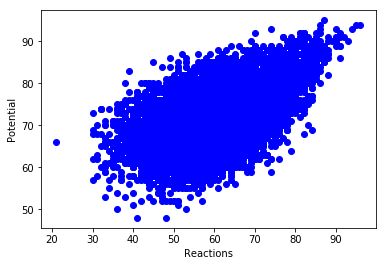

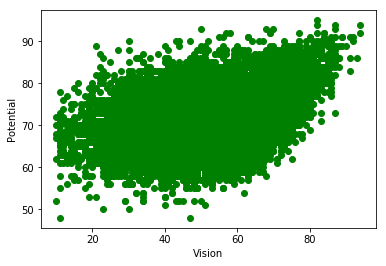

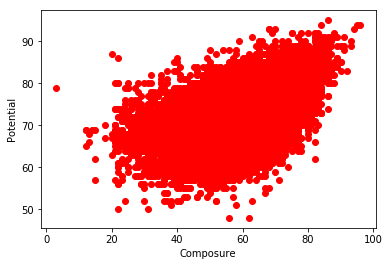

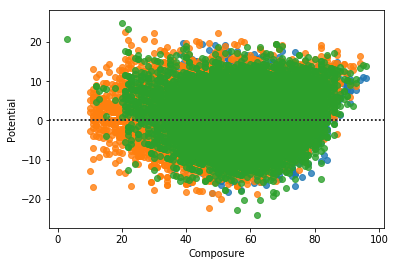

In [169]:
plt.scatter(viz.Reactions, viz.Potential,  color='blue')
plt.xlabel("Reactions")
plt.ylabel("Potential")
plt.show()

plt.scatter(viz.Vision, viz.Potential,  color='green')
plt.xlabel("Vision")
plt.ylabel("Potential")
plt.show()

plt.scatter(viz.Composure, viz.Potential,  color='red')
plt.xlabel("Composure")
plt.ylabel("Potential")
plt.show()

sns.residplot(x='Reactions', y='Potential', data=viz)
sns.residplot(x='Vision', y='Potential', data=viz)
sns.residplot(x='Composure', y='Potential', data=viz)

#sns.regplot(x='Reactions', y='Potential', data=viz)

# Model Training

In [170]:
cdf=viz[['Reactions','Vision','Composure','Potential']]
msk = np.random.rand(len(viz)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [171]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Reactions','Vision','Composure']])
y = np.asanyarray(train[['Potential']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[0.26705285 0.03225856 0.06704257]]
Intercept:  [49.16150001]


# Model Prediction

In [172]:
y_hat= regr.predict( test[['Reactions','Vision','Composure']])
x = np.asanyarray(test[['Reactions','Vision','Composure']])
y = np.asanyarray(test[['Potential']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 26.42
Variance score: 0.29


# Conclusion

### The feature 'BallControl' can be chosen as target variable for predicting the model.